<a href="https://colab.research.google.com/github/Aravind-Reddy7/ML-Projects/blob/main/project_7_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import The Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#Data Collection And Analysis

In [2]:
df = pd.read_csv('/content/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [8]:
df.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [9]:
df.Seller_Type.value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [10]:
df.Transmission.value_counts()

,count
Transmission,
Manual,261
Automatic,40


#Encoding Categorical Data

In [127]:
df.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG': 2}}, inplace = True)

In [128]:
df.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace = True)

In [129]:
df.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace = True)

#Train Test Split

In [142]:
X = df.drop(['Car_Name', 'Selling_Price'], axis = 1)

In [157]:
Y = df['Selling_Price']

In [158]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [159]:
Y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2, test_size = 0.1)

In [161]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


In [162]:
print(Y.shape, Y_train.shape, Y_test.shape)

(301,) (270,) (31,)


#Model Training
* Linear Regression

In [163]:
model = LinearRegression()

In [164]:
model.fit(X_train, Y_train)

LinearRegression()

#Model Evalution

In [165]:
training_data_prediction = model.predict(X_train)

In [166]:
error_score = metrics.r2_score(Y_train, training_data_prediction)

In [167]:
print('R squared Error : ', error_score)

R squared Error :  0.8799451660493711


#Visualize Actual Prices VS Predicted Prices

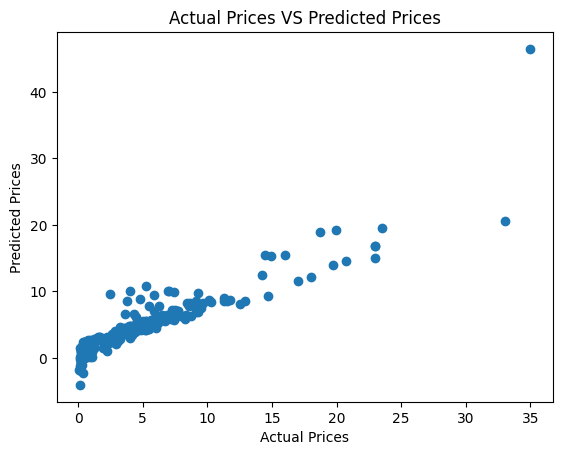

In [183]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices VS Predicted Prices')
plt.show()

In [173]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [174]:
print('R squared Error : ', error_score)

R squared Error :  0.8365766715027051


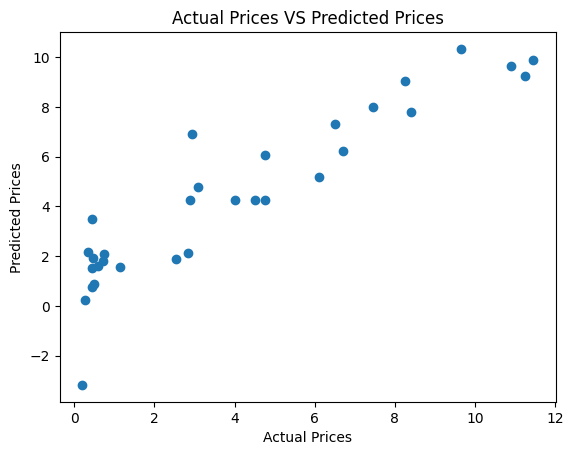

In [175]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices VS Predicted Prices')
plt.show()

#Lasso Regression

In [177]:
model = Lasso()

In [178]:
model.fit(X_train, Y_train)

Lasso()

In [179]:
training_data_prediction = model.predict(X_train)

In [180]:
error_score = metrics.r2_score(Y_train, training_data_prediction)

In [181]:
print('R squared Error : ', error_score)

R squared Error :  0.8427856123435794


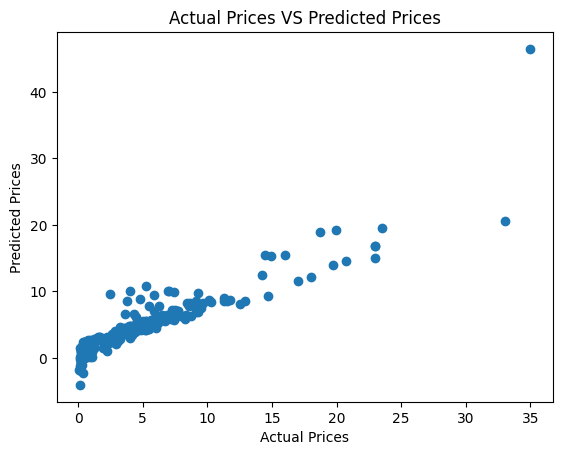

In [184]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices VS Predicted Prices')
plt.show()

In [185]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [186]:
print('R squared Error : ', error_score)

R squared Error :  0.8365766715027051


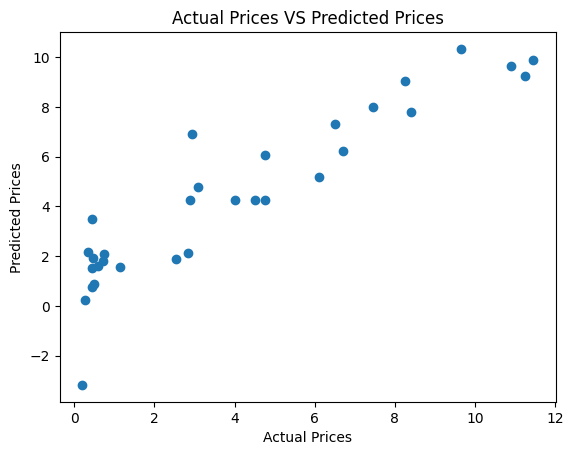

In [187]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices VS Predicted Prices')
plt.show()